In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, TimeDistributed, RepeatVector
import matplotlib.pyplot as plt

In [2]:
def generate_data(n_samples=10000, sequence_length=10, vocab_size=20):
    X = np.random.randint(1, vocab_size, size=(n_samples, sequence_length))
    Y = np.flip(X, axis=1)
    X_oh = tf.keras.utils.to_categorical(X, num_classes=vocab_size)
    Y_oh = tf.keras.utils.to_categorical(Y, num_classes=vocab_size)
    return X_oh, Y_oh

In [3]:
X, Y = generate_data()

In [4]:
def build_model(cell_type='RNN'):
    model = Sequential()
    input_shape = (X.shape[1], X.shape[2])

    if cell_type == 'RNN':
        model.add(SimpleRNN(128, input_shape=input_shape))
        model.add(RepeatVector(X.shape[1]))
        model.add(SimpleRNN(128, return_sequences=True))
    elif cell_type == 'LSTM':
        model.add(LSTM(128, input_shape=input_shape))
        model.add(RepeatVector(X.shape[1]))
        model.add(LSTM(128, return_sequences=True))
    elif cell_type == 'GRU':
        model.add(GRU(128, input_shape=input_shape))
        model.add(RepeatVector(X.shape[1]))
        model.add(GRU(128, return_sequences=True))

    model.add(TimeDistributed(Dense(X.shape[2], activation='softmax')))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


Training RNN model...


C:\Users\VIGHNESH\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training LSTM model...

Training GRU model...


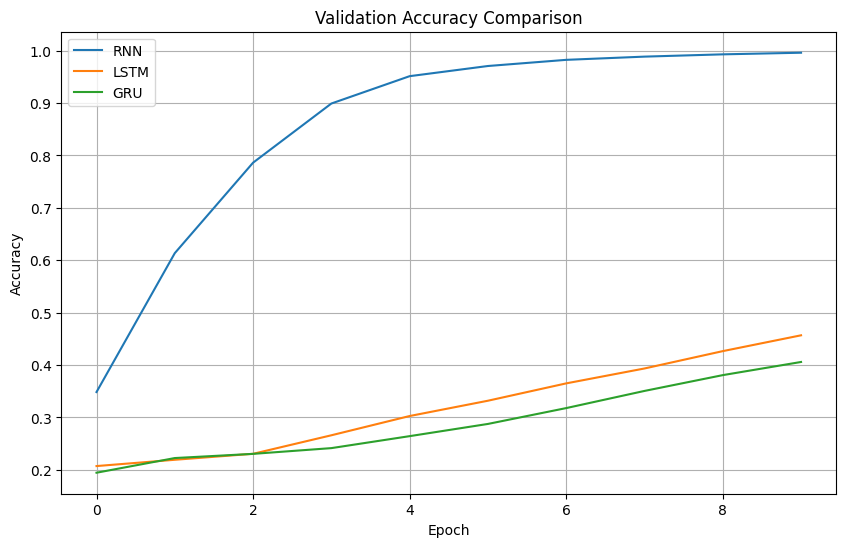

In [5]:
histories = {}
for cell_type in ['RNN', 'LSTM', 'GRU']:
    print(f"\nTraining {cell_type} model...")
    model = build_model(cell_type)
    history = model.fit(X, Y, epochs=10, batch_size=128, validation_split=0.2, verbose=0)
    histories[cell_type] = history

# Plot Validation Accuracy Comparison
plt.figure(figsize=(10, 6))
for cell_type, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{cell_type}')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

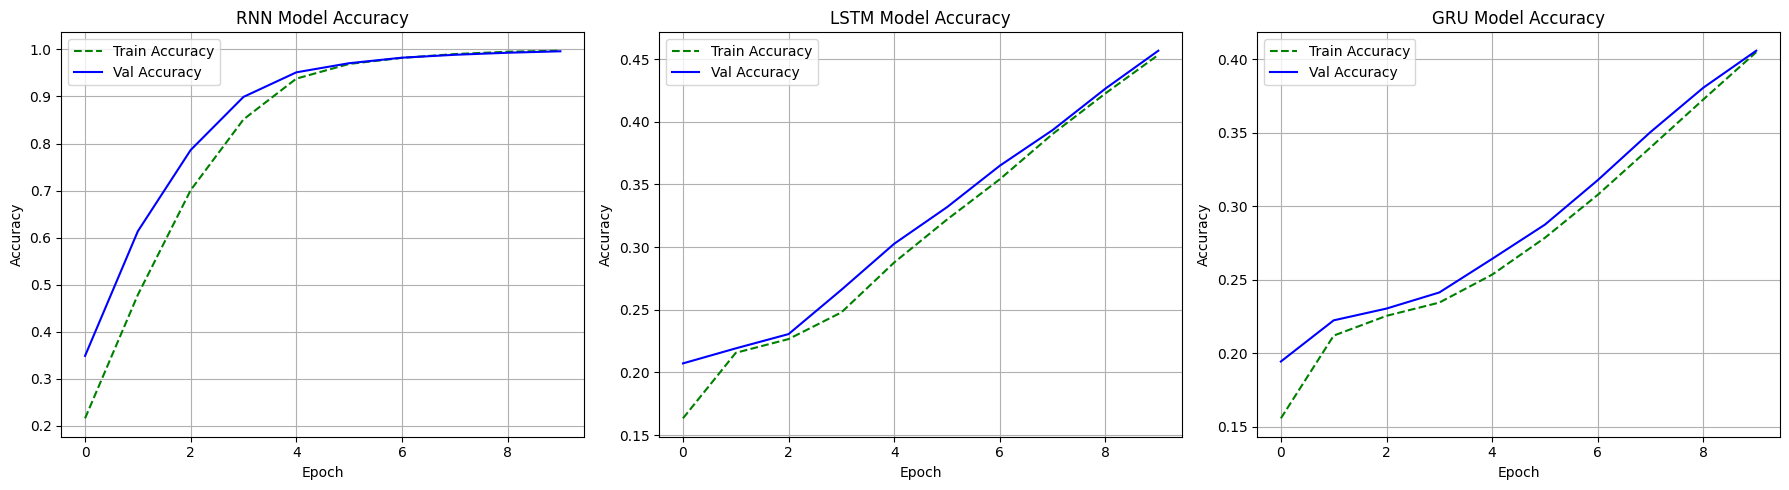

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, cell_type in enumerate(['RNN', 'LSTM', 'GRU']):
    history = histories[cell_type]
    axes[i].plot(history.history['accuracy'], label='Train Accuracy', linestyle='--', color='green')
    axes[i].plot(history.history['val_accuracy'], label='Val Accuracy', color='blue')
    axes[i].set_title(f'{cell_type} Model Accuracy')
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Accuracy')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [8]:
print("\nFinal Validation Accuracy:")
for cell_type in ['RNN', 'LSTM', 'GRU']:
    final_val_acc = histories[cell_type].history['val_accuracy'][-1]
    print(f"{cell_type}: {final_val_acc:.4f}")


Final Validation Accuracy:
RNN: 0.9961
LSTM: 0.4568
GRU: 0.4059
